In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
pip install --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install punkt

ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
#set the path to your system's SSL certificate bundle
os.environ['REQUESTS_CA_BUNDLE'] = '/path/to/certifi/cacert.pem'

In [2]:
import ssl
#disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chitturidevisamyuktha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
#creating a dataframe for the train data
raw_reviews = pd.read_csv('train.csv', header=None, nrows=40000)

#adding header to the dataset
raw_reviews.columns = ['Polarity', 'Title', 'Text']

#print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(40000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Polarity  40000 non-null  int64 
 1   Title     39995 non-null  object
 2   Text      40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None


In [6]:
#viewing the data
raw_reviews.head()

,Polarity,Title,Text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [7]:
raw_reviews = raw_reviews[['Polarity', 'Text']].reset_index(drop=True)
raw_reviews.head(10)

,Polarity,Text
0,2,This sound track was beautiful! It paints the ...
1,2,I'm reading a lot of reviews saying that this ...
2,2,This soundtrack is my favorite music of all ti...
3,2,I truly like this soundtrack and I enjoy video...
4,2,"If you've played the game, you know how divine..."
5,2,I am quite sure any of you actually taking the...
6,1,"This is a self-published book, and if you want..."
7,2,I loved Whisper of the wicked saints. The stor...
8,2,I just finished reading Whisper of the Wicked ...
9,2,This was a easy to read book that made me want...


### Data Cleaning

In [8]:
#creating a copy of the data
process_reviews=raw_reviews.copy()

#Checking for null values
missing_values = process_reviews.columns[process_reviews.isnull().any()]
print(missing_values)

Index([], dtype='object')


There are no null values.

In [9]:
#drop duplicates if any
process_reviews.drop_duplicates()

,Polarity,Text
0,2,This sound track was beautiful! It paints the ...
1,2,I'm reading a lot of reviews saying that this ...
2,2,This soundtrack is my favorite music of all ti...
3,2,I truly like this soundtrack and I enjoy video...
4,2,"If you've played the game, you know how divine..."
...,...,...
39995,1,"The book boasts Intermediate - Advanced users,..."
39996,2,I would highly recommend this product as it sa...
39997,2,"I have an old, heavy duty garden hose that dev..."
39998,2,I went way to long with a seized nozzle on my ...


In [10]:
#count polarities
process_reviews.Polarity.value_counts(normalize = True)

Polarity
2    0.5086
1    0.4914
Name: proportion, dtype: float64

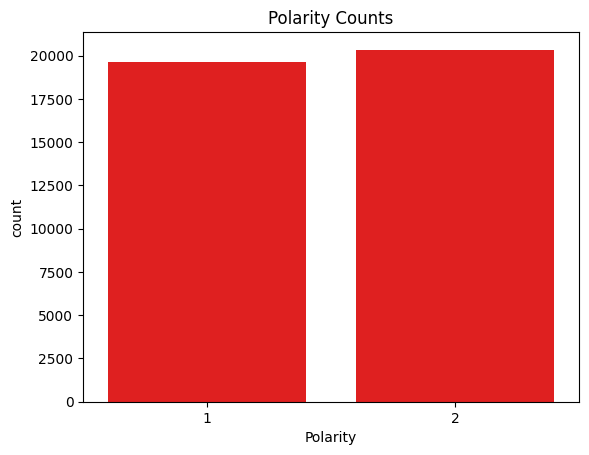

In [11]:
#ploting using seaborn
sns.set_palette(['red','blue']) 
sns.countplot(x=process_reviews['Polarity'])
pyplot.title('Polarity Counts')
pyplot.show()

In [51]:
'''def preprocess_text(text):
    #make text lowercase and remove links, text in square brackets, punctuation, and words containing numbers
    text = text.lower()
    stop_words = re.sub(r'https?://\S+|www\.\S+|\[.*?\]|[^a-zA-Z\s]+|\w*\d\w*!,-~', '', text)
    
    #remove stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    return ' '.join(filtered_words).strip()'''

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def preprocess_text(text):
    # Make text lowercase
    text = text.lower()

    # Remove links, text in square brackets, and punctuation
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]|\W+', ' ', text)

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    return ' '.join(filtered_words).strip()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chitturidevisamyuktha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
#apply preprocess_text to all data
process_reviews['Text'] = process_reviews['Text'].apply(preprocess_text)

In [53]:
process_reviews.head(10)

,Polarity,Text
0,2,_
1,2,game fade th
2,2,scar well thi n n
3,2,peaceful valley disk jewel overal music xand
4,2,
5,2,game compos n heart rend fast pac thi _
6,1,self publish ms n n ms stay
7,2,
8,2,n
9,2,


In [54]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() 
def stem_text(text):
    #tokenize the text
    tokens = nltk.word_tokenize(text)
    
    #stem each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    #join the stemmed tokens back into a single string
    return ' '.join(stemmed_tokens)

In [55]:
#apply stem_text to all data
process_reviews['Text'] = process_reviews['Text'].apply(stem_text)

In [56]:
process_reviews.head()

,Polarity,Text
0,2,_
1,2,game fade th
2,2,scar well thi n n
3,2,peac valley disk jewel over music xand
4,2,


### Exploration Data Analysis (EDA)

In [57]:
#count words from the 'Review' column
count = Counter(' '.join(process_reviews['Text']).split())

#create a DataFrame from the word counts
words = pd.DataFrame(count.items(), columns=['Words', 'Frequency'])

#sort by frequency and reset the index
words = words.sort_values('Frequency', ascending=False).reset_index(drop=True)

#add a Rank column
words['Rank'] = words.index + 1
words = words[['Rank', 'Words', 'Frequency']]

words.head(20)

,Rank,Words,Frequency
0,1,n,19888
1,2,th,1744
2,3,thi,894
3,4,mr,668
4,5,well,459
5,6,non,437
6,7,book,407
7,8,c,406
8,9,e,385
9,10,read,377


In [58]:
def generate_wordcloud(input):
    cloud = WordCloud(width=1500, height=800, max_words=500, background_color='black', colormap='coolwarm')
    wordcloud = cloud.generate(input)
    pyplot.figure(figsize=(10, 8))
    pyplot.imshow(wordcloud, interpolation='bilinear')
    pyplot.axis('off')
    pyplot.tight_layout()
    pyplot.show()

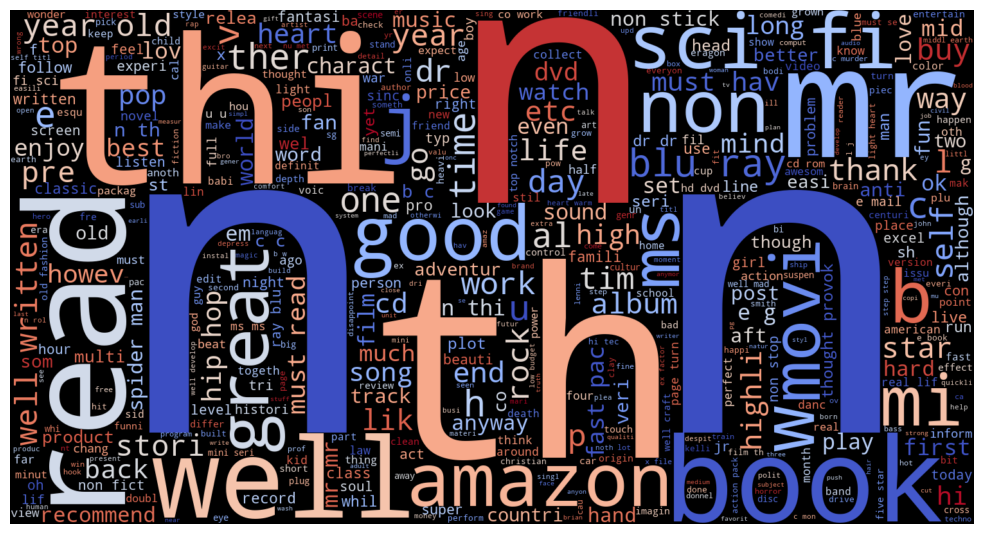

In [59]:
#wordcloud for positive reviews
positive_words = " ".join(process_reviews[process_reviews['Polarity'] == 2]['Text'])
generate_wordcloud(positive_words)

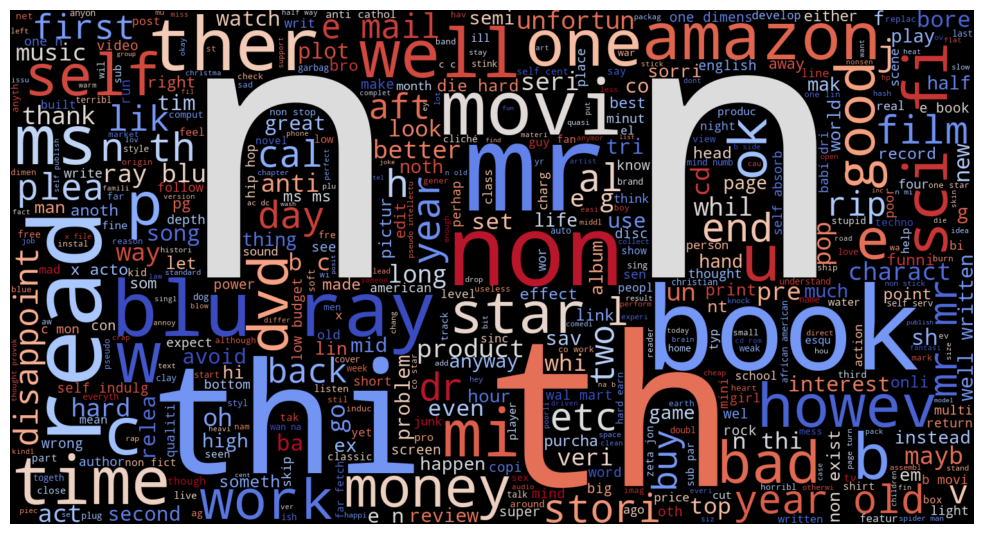

In [60]:
#wordcloud for negative reviews
negative_words = " ".join(process_reviews[process_reviews['Polarity'] == 1]['Text'])
generate_wordcloud(negative_words)

In [61]:
def show_top_words(input, type):
    words = input.split()
    top_words = pd.DataFrame(Counter(words).most_common(25), columns=['Term', 'Count'])
    sns.set_theme(style="whitegrid")
    pyplot.figure(figsize=(12, 10))
    sns.barplot(x='Count', y='Term', data=top_words, palette='coolwarm')
    pyplot.title(f"Top 25 Words in {type} Reviews")
    pyplot.xlabel("Occurrences")
    pyplot.ylabel("Terms")
    pyplot.tight_layout()
    pyplot.show()

/var/folders/pl/8r60qb457t17v7hc5clsz2580000gn/T/ipykernel_52678/96658062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Term', data=top_words, palette='coolwarm')


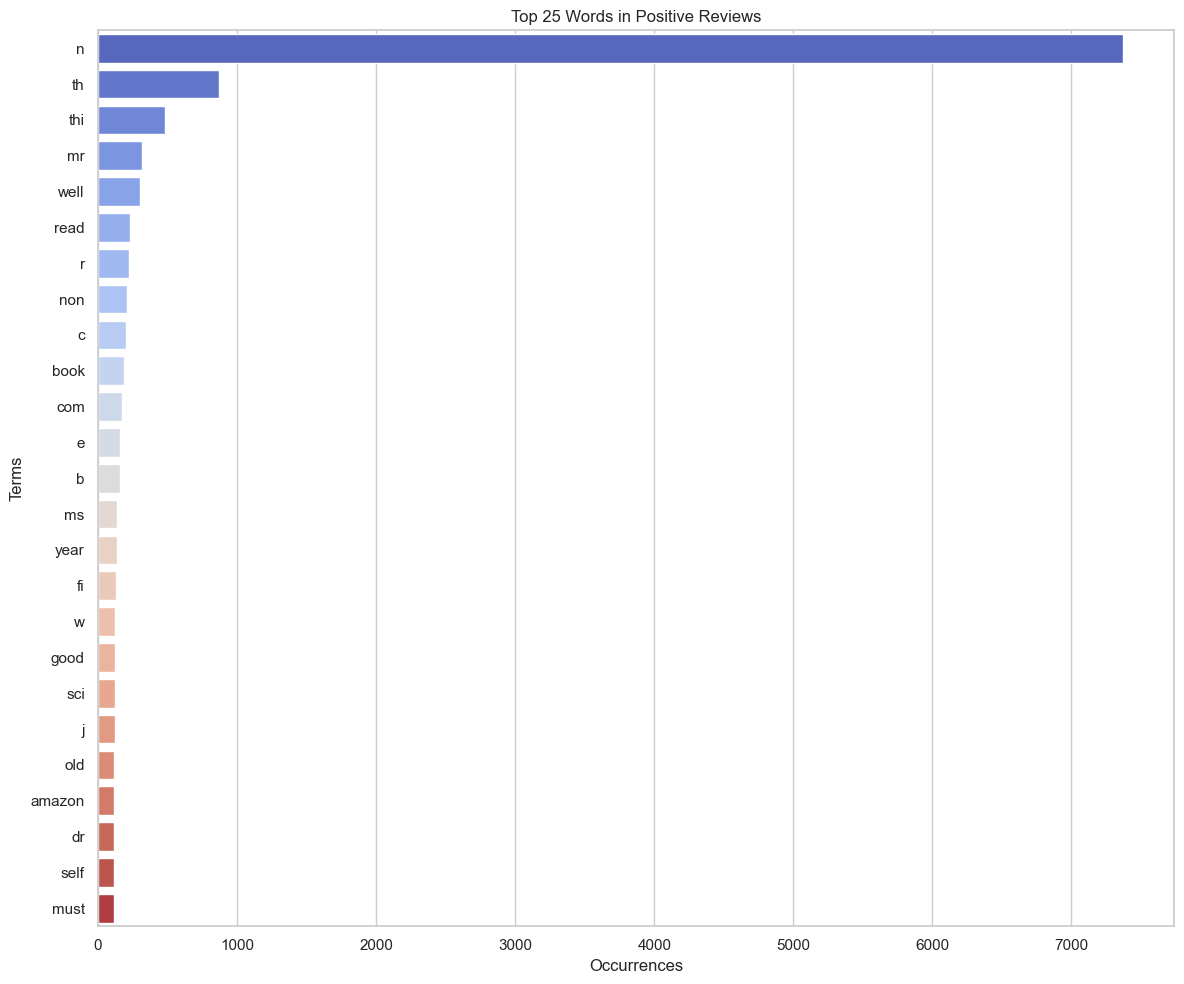

In [62]:
show_top_words(positive_words, "Positive")

/var/folders/pl/8r60qb457t17v7hc5clsz2580000gn/T/ipykernel_52678/96658062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Term', data=top_words, palette='coolwarm')


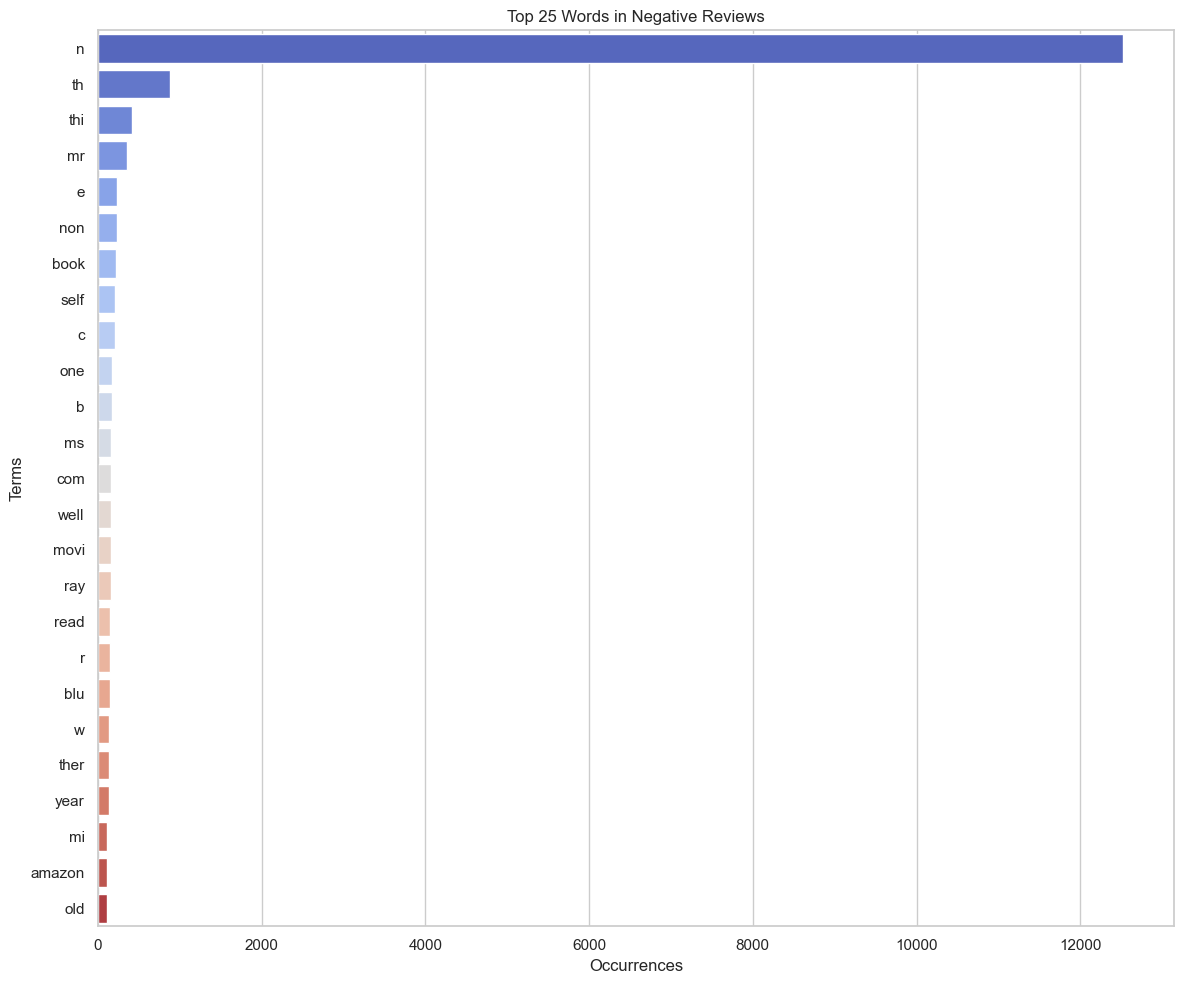

In [63]:
show_top_words(negative_words, "Negative")

### Training model

In [64]:
#instantiate the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

#fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(process_reviews['Text'])
y_train = process_reviews['Polarity']

#initialize the classifier
clf = LinearSVC()

#train the classifier
clf.fit(X_train_tfidf, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [65]:
#reading the test dataset
test_df = pd.read_csv('test.csv', header=None, nrows=40000)
test_df.columns = ['Polarity', 'Title', 'Text']
test_df = test_df[['Polarity', 'Text']].reset_index(drop=True)

In [66]:
#preprocessing test data
test_df['Text'] = test_df['Text'].apply(preprocess_text)
test_df['Text'] = test_df['Text'].apply(stem_text)

In [67]:
X_test_tfidf = tfidf_vectorizer.transform(test_df['Text'])

In [68]:
y_test = test_df['Polarity']
y_pred = clf.predict(X_test_tfidf)

In [69]:
#printing out results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.71905

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.77      0.73     19641
           2       0.75      0.67      0.71     20359

    accuracy                           0.72     40000
   macro avg       0.72      0.72      0.72     40000
weighted avg       0.72      0.72      0.72     40000



In [70]:
def predict_sentiment(text):
    # Preprocess the input text
    preprocessed_text = stem_text(preprocess_text(text))
    
    # Transform the text using the trained tfidf_vectorizer
    features = tfidf_vectorizer.transform([preprocessed_text])
    
    # Predict using the trained classifier
    prediction = clf.predict(features)[0]
    
    # Return the sentiment
    if prediction == 1:
        return "Negative"
    else:
        return "Positive"

In [71]:
print(predict_sentiment("This has to be the worst software I've ever tried. Constant crashes and glitches!"))

Negative


In [72]:
print(predict_sentiment("Great value for the price! The product quality exceeded my expectations."))

Positive


In [73]:
print(predict_sentiment("Had high hopes after reading other reviews, but this just wasn't for me."))

Negative


In [74]:
print(predict_sentiment("Installation was a breeze and it integrated perfectly with my existing setup."))

Positive


In [75]:
print(predict_sentiment("Can't believe I wasted money on this. Extremely disappointing."))

Negative


In [76]:
print(predict_sentiment("The product description was misleading and the actual item was subpar."))

Negative


### Write a review

In [ ]:
print("Write a review (and press Enter):")
review = input()
print("Sentiment: " + predict_sentiment(review))